## Run Analysis on 100K Movie Lens Data

In [1]:
# Imports
import numpy as np
import pandas as pd
import os


# Plotting 
import matplotlib.pyplot as plt 
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [11]:
datapath = "/home/bishal/projects/recomSys/Datasets/100k/ml-100k/"
plotpath = "/home/bishal/projects/recomSys/Plots/100k/"

In [10]:
df_user = pd.read_csv(os.path.join(datapath, "u.user"), sep="|", header=None, names=["user_id", "age", "gender", "occupation", "zipcode"])
                                                                                     

print(df_user.head())

col_rating = ['user_id','item_id','rating','timestamp']
df_rating = pd.read_csv(os.path.join(datapath, "u.data"), sep="\t", header=None, names=col_rating)
df_rating.drop('timestamp', axis=1, inplace=True)
print(df_rating.head())

col_item = ['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_item = pd.read_csv(os.path.join(datapath, "u.item"), sep="|", header=None, names=col_movie, encoding='latin-1')
df_item.drop('video_release_date', axis=1, inplace=True)
print(df_item.head())


   user_id  age gender  occupation zipcode
0        1   24      M  technician   85711
1        2   53      F       other   94043
2        3   23      M      writer   32067
3        4   24      M  technician   43537
4        5   33      F       other   15213
   user_id  item_id  rating
0      196      242       3
1      186      302       3
2       22      377       1
3      244       51       2
4      166      346       1
   item_id        movie_title release_date  \
0        1   Toy Story (1995)  01-Jan-1995   
1        2   GoldenEye (1995)  01-Jan-1995   
2        3  Four Rooms (1995)  01-Jan-1995   
3        4  Get Shorty (1995)  01-Jan-1995   
4        5     Copycat (1995)  01-Jan-1995   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  ht

In [4]:
print(f"No. unique users: {len(df_user['user_id'].unique())}")

No. unique users: 943


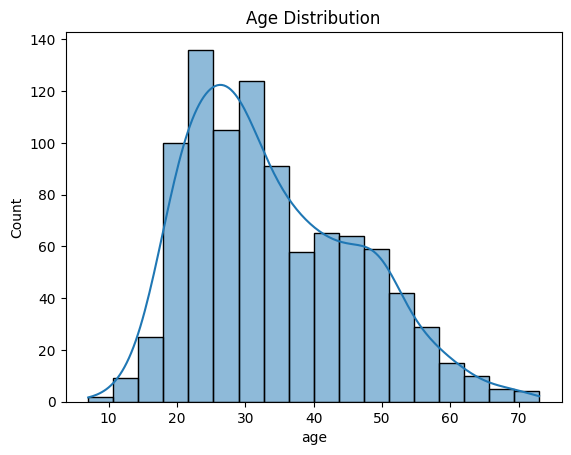

In [12]:
sns.histplot(df_user['age'], kde=True)
plt.title("Age Distribution")
plt.savefig(os.path.join(plotpath, "age_distribution.png"))

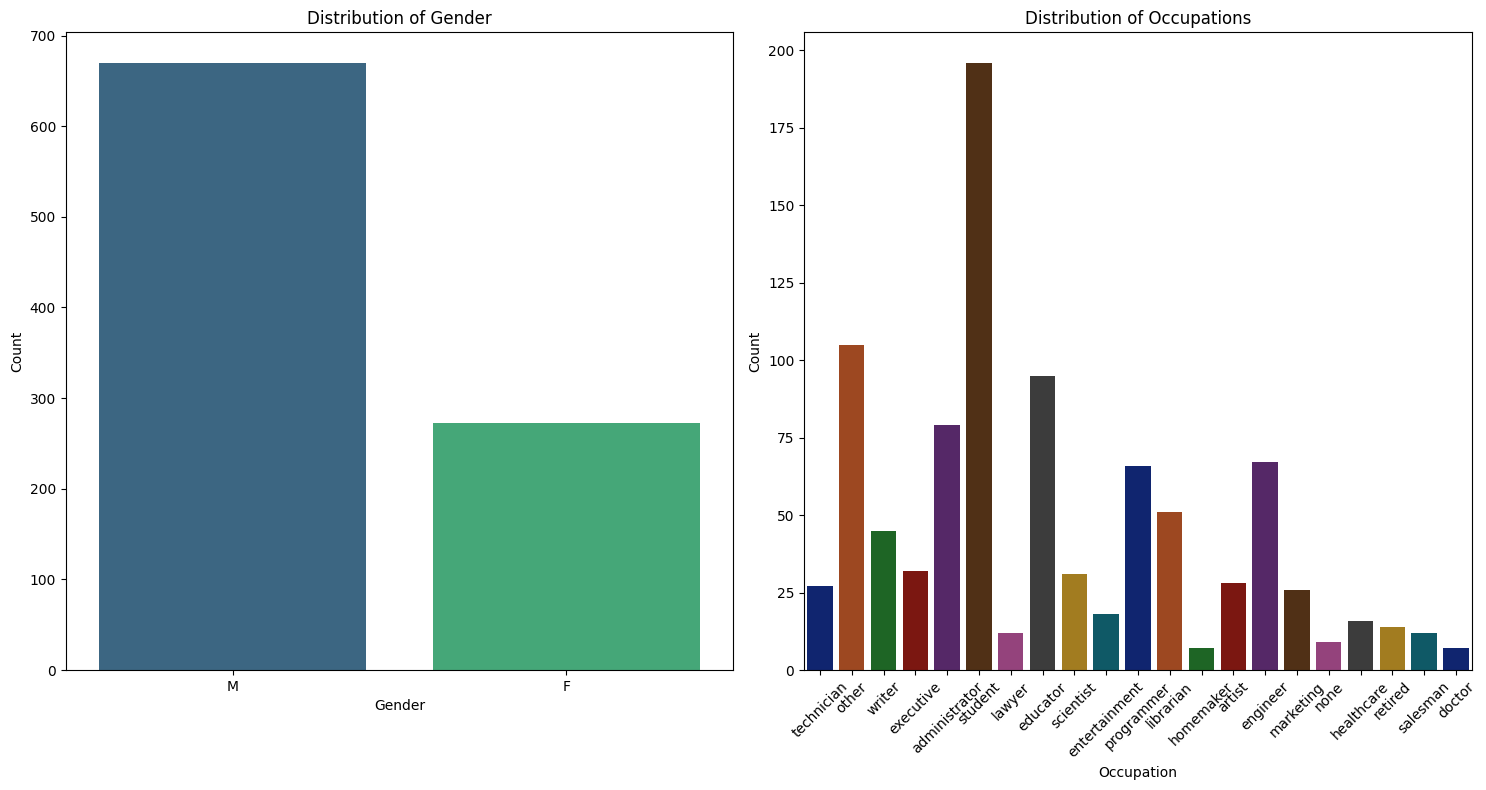

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Plot for 'gender'
sns.countplot(x='gender', data=df_user, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot for 'occupation'
sns.countplot(x='occupation', data=df_user, palette='dark', ax=axes[1])
axes[1].set_title('Distribution of Occupations')
axes[1].set_xlabel('Occupation')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()
#save fig
plt.savefig(os.path.join(plotpath, "gender_occupation_distribution.png"))

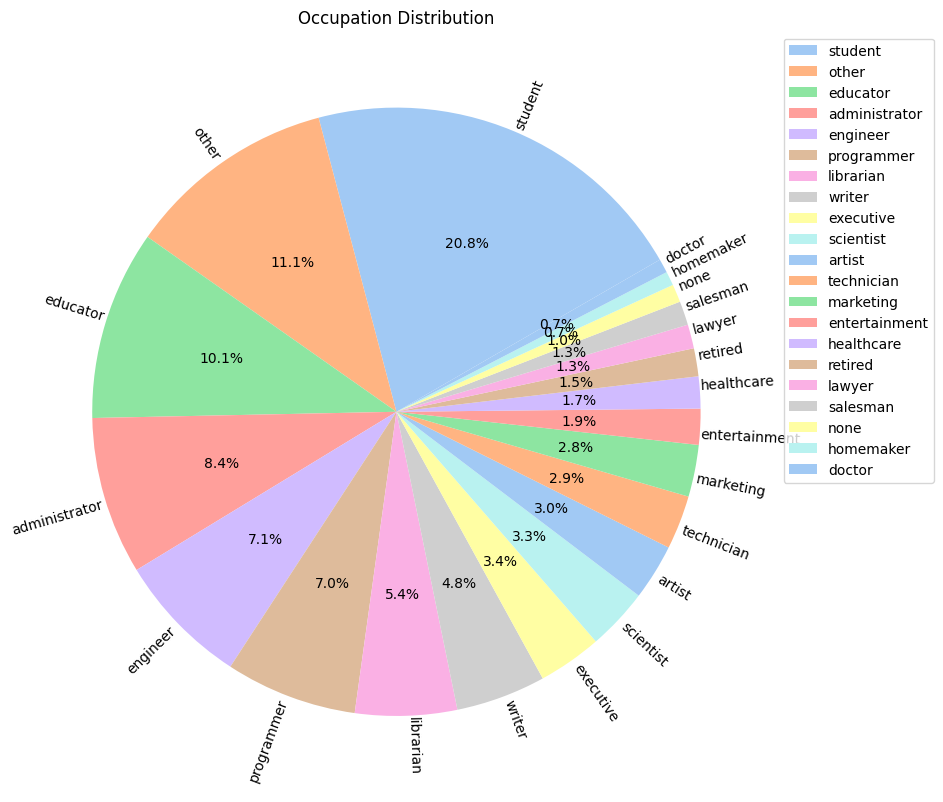

In [14]:
occupation_counts = df_user['occupation'].value_counts()

# Plot a pie chart with improved readability
plt.figure(figsize=(12, 8))
plt.pie(occupation_counts, labels=occupation_counts.index, rotatelabels=True, autopct='%1.1f%%', labeldistance=1.0, startangle=30, colors=sns.color_palette('pastel'))

# Add a legend and adjust layout
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.title('Occupation Distribution')
#save fig
plt.savefig(os.path.join(plotpath, "occupation_distribution.png"))

In [15]:
um_user = len(df_rating['user_id'].unique())
num_item = len(df_rating['item_id'].unique())
latent_factor = 64

In [16]:
rand_split = np.random.rand(len(df_rating)) < 0.8
train = df_rating[rand_split]
valid = df_rating[~rand_split]
print(train.shape , valid.shape)

(80136, 3) (19864, 3)
